In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
data = pd.read_csv("./Data/cleandata.csv")

x = data.iloc[:,:-1]

y = data.IsABot.values.tolist()


SelectKBest

In [2]:
# Select features according to the k highest scores.
bestfeatures = SelectKBest(score_func=f_classif,k='all')
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 10 best features

# result :avg_tweets_by_day_of_week,avg_tweets_by_hour_of_day,verified ,location,date_joined, likes

                            Specs        Score
13      avg_videos_by_day_of_week  1252.492405
6                           posts  1252.001710
7         AverageNumberOfHashtags   768.452184
11  AverageNumberOfLinkedProfiles   438.896520
4           HasAccountDescription   171.870891
0                      IsVerified   128.057524
5                           likes    50.346302
2                       following    41.587130
1               HasProfilePicture    40.436915
9            AverageNumberOfShare    35.744721
3                        follower    32.497067
12           AverageNumberOfViews    24.695652
10           AverageNumberOfLikes    22.984383
8         AverageNumberOfComments    14.010281


Tree-based Feature Selection
RandomForestClassifier

[0.00035764 0.01524836 0.24636502 0.1284315  0.01697817 0.17774468
 0.01782321 0.0554448  0.11002181 0.02896328 0.06139143 0.04445374
 0.06772086 0.02905551]


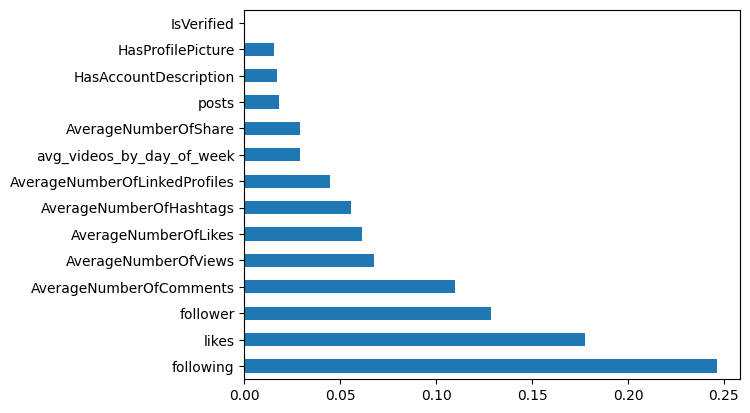

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

[0.         0.00999866 0.26238549 0.13650913 0.01131514 0.45779517
 0.00780209 0.01409865 0.0180582  0.01105099 0.03183892 0.01305608
 0.01563848 0.010453  ]


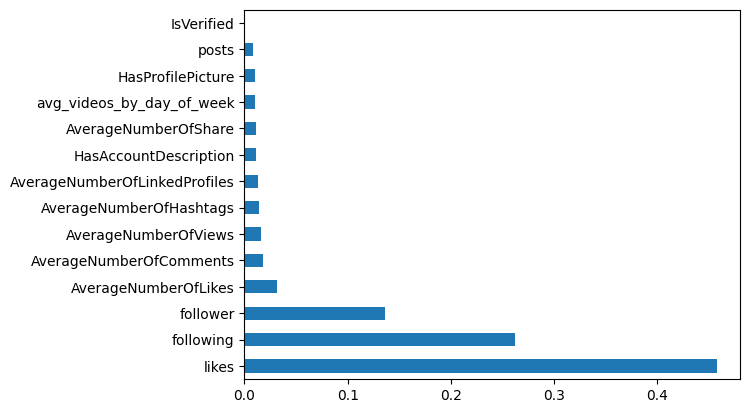

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = DecisionTreeClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

correlations

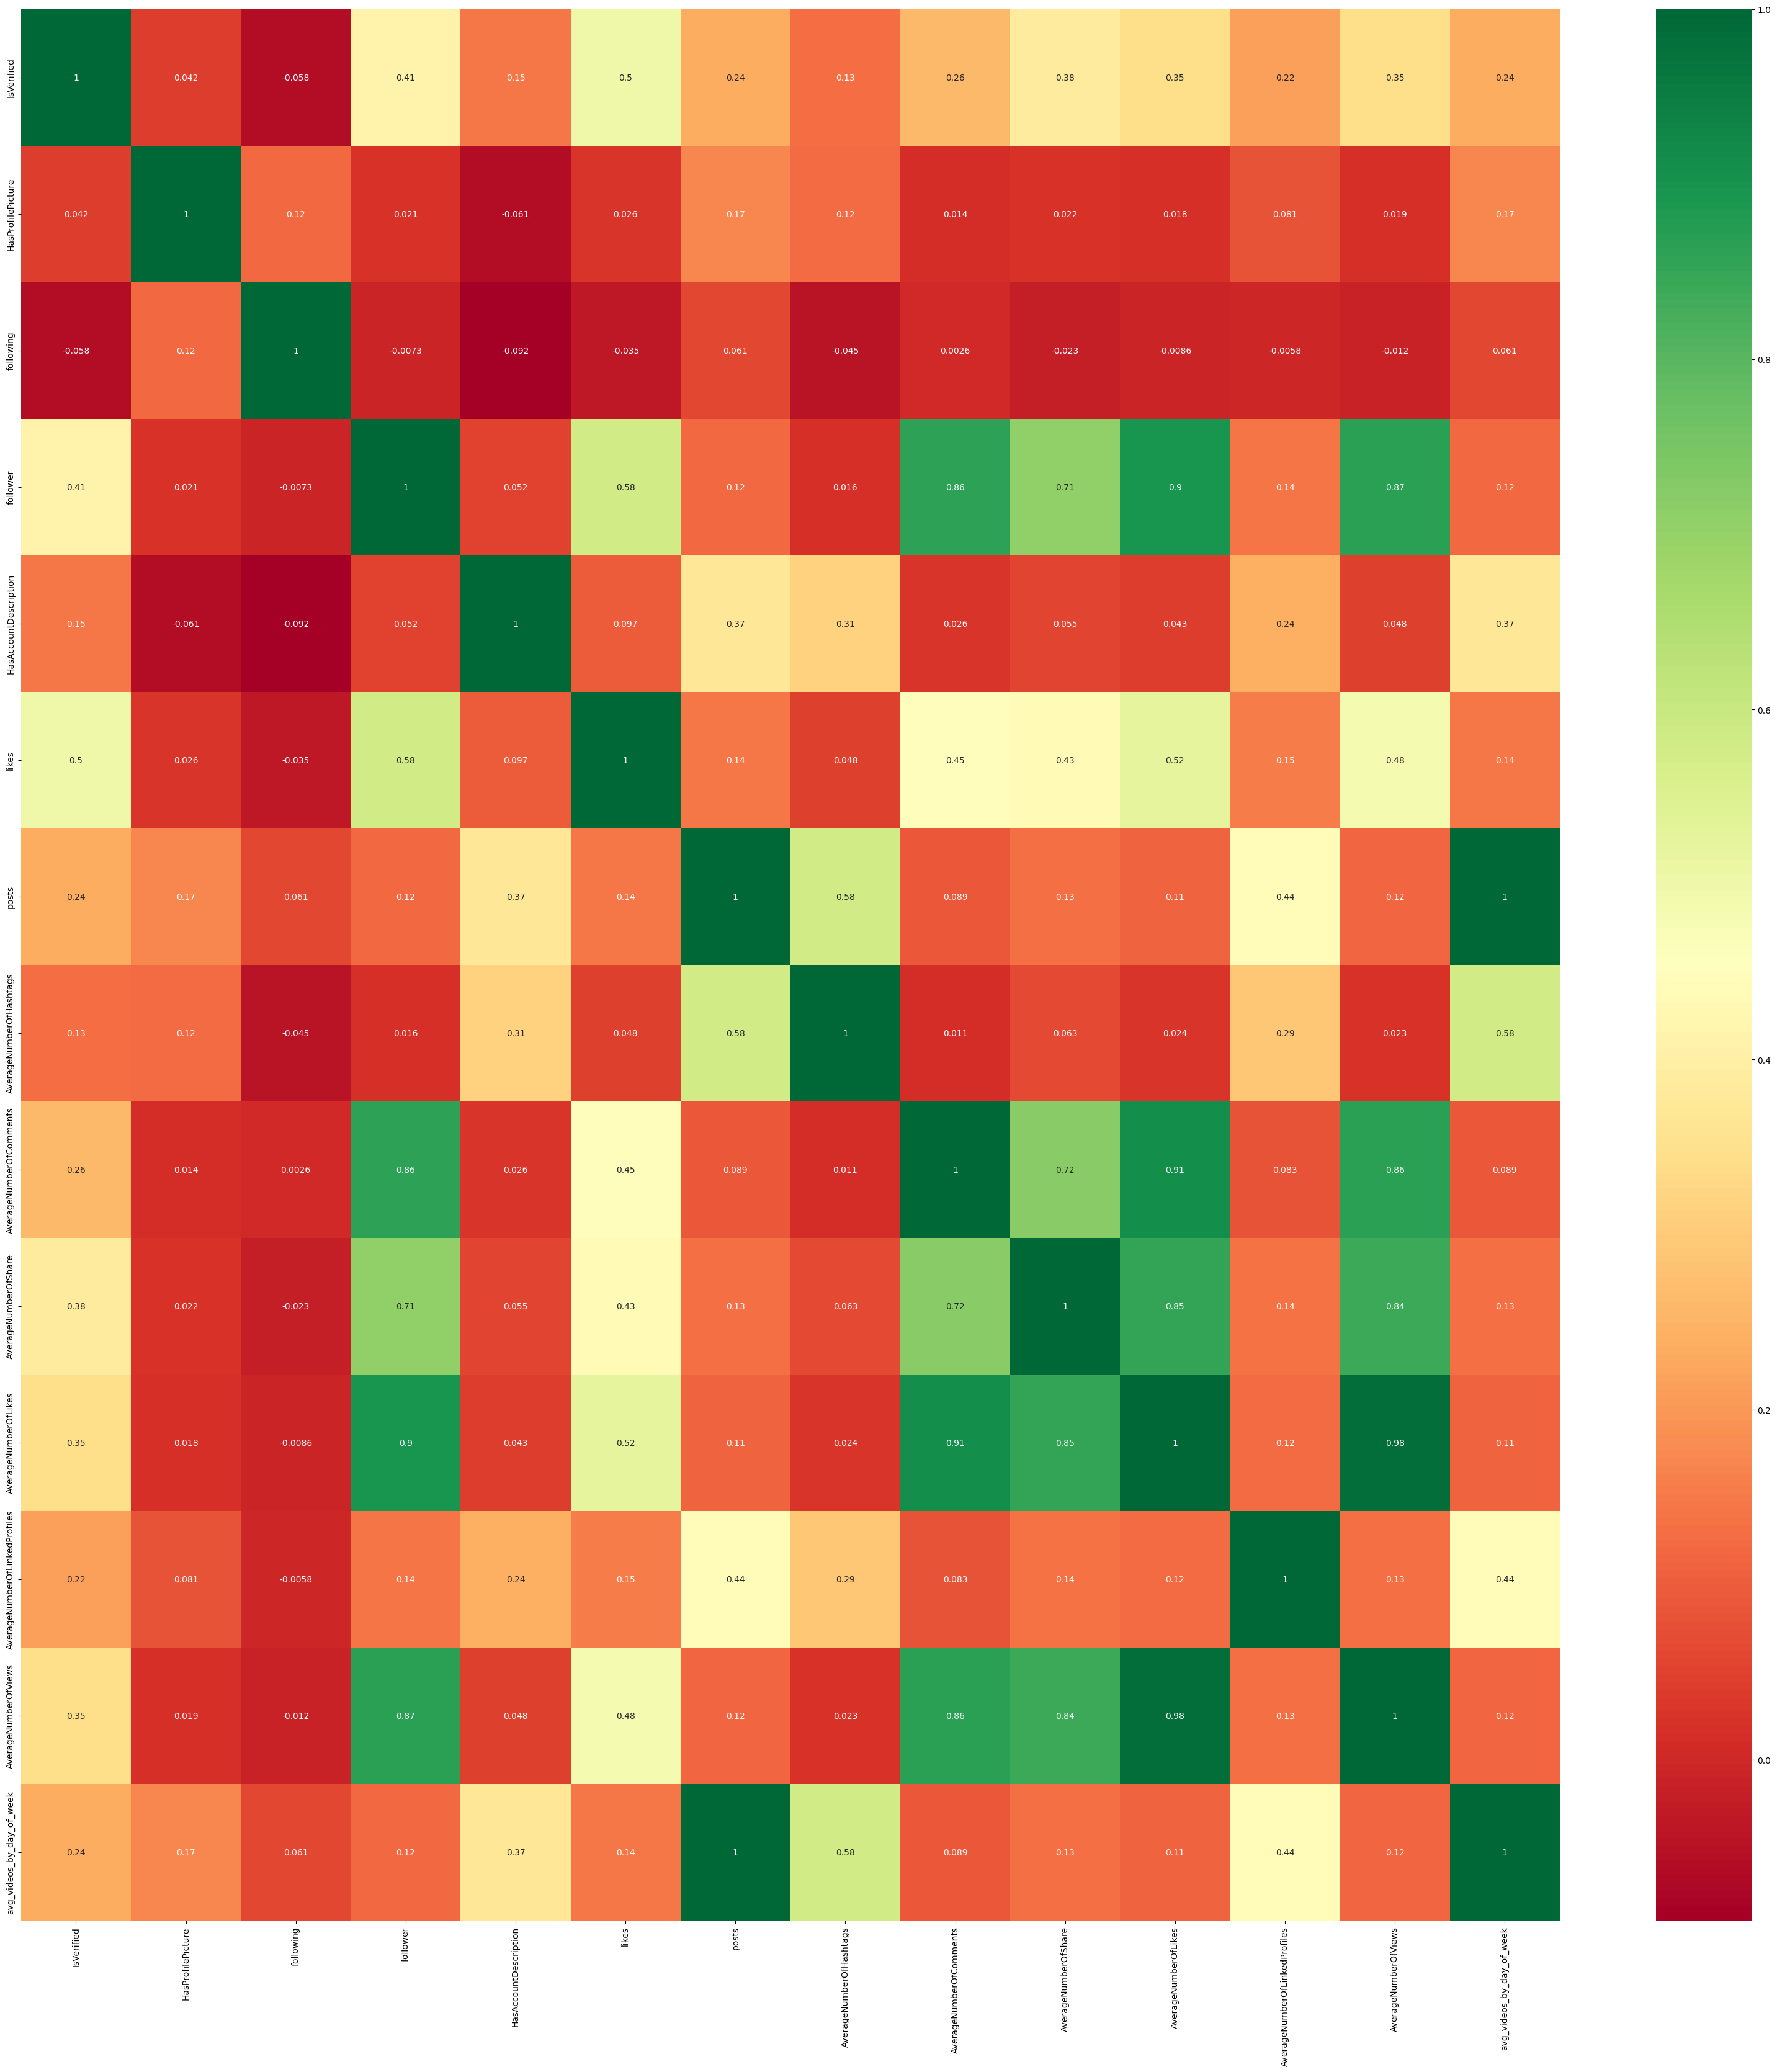

In [5]:
import pandas as pd
import numpy as npmutual_info_classif
import seaborn as sns

#get correlations of each features in dataset
corrmat = x.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,40))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

there is correlation between :
avg number of likes - avg number of views :positive 
posts -tweet by day : positive 



Correlation-based Feature Selection (CFS)

In [6]:
bestfeatures = SelectKBest(score_func=mutual_info_classif,k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                            Specs     Score
5                           likes  0.247536
3                        follower  0.222308
8         AverageNumberOfComments  0.218598
9            AverageNumberOfShare  0.210061
10           AverageNumberOfLikes  0.201463
12           AverageNumberOfViews  0.190884
7         AverageNumberOfHashtags  0.170544
6                           posts  0.167396
13      avg_videos_by_day_of_week  0.162762
11  AverageNumberOfLinkedProfiles  0.155602


Recursive Feature Elimination (RFE)

In [7]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_sequential_feature_selection

clf=RandomForestClassifier()
estimator = LogisticRegression(solver='liblinear')
selector = RFE(clf, n_features_to_select=10)
selected_features = selector.fit(x, y)

x.loc[:, selected_features.support_]

,following,follower,likes,AverageNumberOfHashtags,AverageNumberOfComments,AverageNumberOfShare,AverageNumberOfLikes,AverageNumberOfLinkedProfiles,AverageNumberOfViews,avg_videos_by_day_of_week
0,63.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00
1,3171.0,93.0,3.0,0.0,0.00,0.00,3.00,0.0,21.00,0.14
2,2255.0,132.0,78.0,0.0,0.00,0.67,26.00,0.0,557.67,0.43
3,1.0,5.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00
4,1168.0,89.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2976,36.0,62300.0,609900.0,3.7,97.75,74.60,4553.85,0.1,33985.00,2.86
2977,3208.0,182.0,18.0,0.0,1.00,0.00,9.00,0.0,26.00,0.29
2978,337.0,2.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00
2979,314.0,3.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00
